## SVM Models
Scaling required for SVM Models
### Importing libraries

In [26]:
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

### Preparing the data

In [27]:
iris = datasets.load_iris()
X = iris["data"][:, (2, 3)] # petal length, petal width
y = (iris["target"] == 2).astype(np.float64) # Iris-Virginica

In [28]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

### LinearSVC Classification
The LinearSVC class regularizes the bias term, so you should center
the training set first by subtracting its mean. This is automatic if
you scale the data using the StandardScaler . Moreover, make sure
you set the loss hyperparameter to "hinge" , as it is not the default
value. Finally, for better performance you should set the dual
hyperparameter to False , unless there are more features than
training instances

Small C means more area, big C means small area

In [29]:
from sklearn.pipeline import make_pipeline

clf = make_pipeline(StandardScaler(), LinearSVC(C=1, loss="hinge"))
clf.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearsvc', LinearSVC(C=1, loss='hinge'))])

In [31]:
# clf.predict([[5.5, 1.7]])
y_pred = clf.predict(X_test)

### Evaluation

In [32]:
from sklearn import metrics

metrics.accuracy_score(y_test, y_pred)

1.0

In [34]:
from sklearn.model_selection import cross_val_score

cross_val_score(clf, X_train, y_train, cv=5, scoring="accuracy")

array([0.95652174, 0.95652174, 0.81818182, 1.        , 0.95454545])

In [35]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_pred)

array([[26,  0],
       [ 0, 12]])

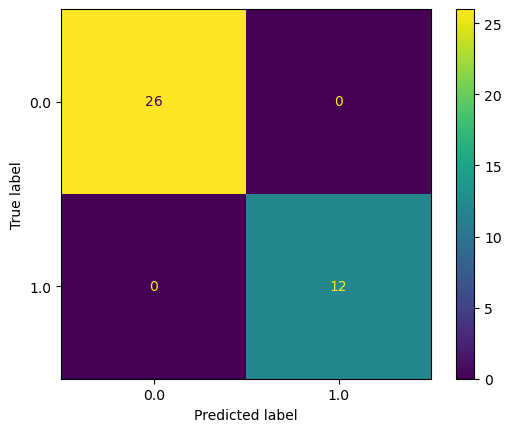

In [36]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot()
plt.show()

In [37]:
from sklearn.metrics import precision_score, recall_score

precision_score(y_test, y_pred), recall_score(y_test, y_pred)

(1.0, 1.0)

In [38]:
from sklearn.metrics import f1_score

f1_score(y_test, y_pred)

1.0

Another
option is to use the SGDClassifier class, with `SGDClassifier(loss="hinge", alpha=1/(m*C))` . This applies regular Stochastic Gradient Descent (see Chapter 4) to
train a linear SVM classifier. It does not converge as fast as the LinearSVC class, but it
can be useful to handle huge datasets that do not fit in memory (out-of-core train‐
ing), or to handle online classification tasks.

### Nonlinear SVM Classification
Adding polynomial features is simple to implement and can work great with all sorts
of Machine Learning algorithms (not just SVMs), but at a low polynomial degree it
cannot deal with very complex datasets, and with a high polynomial degree it creates
a huge number of features, making the model too slow.

In [40]:
from sklearn.preprocessing import PolynomialFeatures

pol_clf = make_pipeline(PolynomialFeatures(degree=3), StandardScaler(), LinearSVC(C=10, loss="hinge"))
pol_clf.fit(X_train, y_train)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=3)),
                ('standardscaler', StandardScaler()),
                ('linearsvc', LinearSVC(C=10, loss='hinge'))])

Fortunately, when using SVMs you can apply an almost miraculous mathematical
technique called the kernel trick. It makes it possible to
get the same result as if you added many polynomial features, even with very high-degree polynomials, without actually having to add them. So there is no combinato‐
rial explosion of the number of features since you don’t actually add any features. This
trick is implemented by the SVC class. 

In [41]:
from sklearn.svm import SVC

polkernel_clf = make_pipeline(StandardScaler(), SVC(kernel="poly", degree=3, coef0=1, C=5))
polkernel_clf.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(C=5, coef0=1, kernel='poly'))])

The hyperparameter coef0 controls how much the model is influenced by high-
degree polynomials versus low-degree polynomials. you can increase or decrease poly degree if your model overfit or underfit. remember grid search is always a good to select the best params.

### SVM classifiers using an RBF kernel
Gaussian RBF Kernel Adding Similarity Features
Another technique to tackle nonlinear problems is to add features computed using a
similarity function that measures how much each instance resembles a particular
landmark.

In [42]:
rbf_clf = make_pipeline(StandardScaler(), SVC(kernel="rbf", gamma=5, C=0.001))
rbf_clf.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(C=0.001, gamma=5))])

small gamma value makes the bell-shaped curve wider, so instances have a larger range of influence, and the decision boundary ends up smoother. So γ acts like a regularization hyperparameter: if your model is overfitting, you should reduce it, and if it is underfitting, you should increase it (similar to the C hyperparameter).

how can you decide which kernel to use? you should always try the **linear kernel** first (LinearSVC is much faster than SVC(kernel="linear")), especially if the training set is very large or if it has plenty of features. If the training set is not too large, you should try the **Gaussian RBF kernel** as well; it works well in most cases.
Then if you have spare time and computing power, you can also experiment with a few other kernels using **cross-validation and grid search**.

### Linear SVM Regression
Adding more training instances within the margin does not affect the model’s predic‐
tions; thus, the model is said to be ε -insensitive. You can use Scikit-Learn’s LinearSVR class to perform linear SVM Regression (the training data should be scaled and centered first), more epsilon means more area.

In [43]:
from sklearn.svm import LinearSVR

svm_reg = LinearSVR(epsilon=1.5)
svm_reg.fit(X_train, y_train)

LinearSVR(epsilon=1.5)

### Non-Linear SVM Regression
To tackle nonlinear regression tasks, you can use a kernelized SVM mode, using a
2 nd degree polynomial kernel. There is little regularization with large
C value, and much more regularization with small C value.

SVMs can also be used for outlier detection

In [44]:
from sklearn.svm import SVR

pol_reg = SVR(kernel="poly", degree=2, C=100, epsilon=0.1)
pol_reg.fit(X_train, y_train)

SVR(C=100, degree=2, kernel='poly')